# [Module 1.2] Train(학습) 과 Validation(검증)의 데이터 분포

이전 노트북에서 전체 데이터 셋을 분리하여 50% 인 ColdStart를 제외하고 나머지 50%인 Train/Validation에 대한 유저 액티비티 분포를 확인 합니다.<br>
아래와 같은 작업을 합니다.
- 학습, 검증 데이터 셋 로딩
- 학습 데이터의 유저 액티비티 통계 및 분포
- 검증 데이터의 유저 액티비티 통계 및 분포

---
이 노트북을 모두 실행하는데 걸리는 시간은 약 2 분 소요 됩니다.


In [15]:
import boto3
import json
import numpy as np
import pandas as pd
import time
from datetime import datetime

import matplotlib.pyplot as plt

In [16]:
%store -r

## 데이타 셋 로딩

df_warm_train,  df_warm_holdout 데이터를 로딩 합니다

In [17]:
pd.options.display.max_rows = 5
df_warm_train = pd.read_csv(warm_train_interaction_filename)
df_warm_holdout = pd.read_csv(validation_interaction_filename)

## Train 데이터의 유저 액티비티 통계

Train 분포는 아래와 같습니다. <br>
**유저에 대해서 최소는 2번이고, 중간값은 40번, 최대는 1029번을 rating을 했습니다.**

- 참고로 Warm, ColdStart 분할 전의 전체 분포는 아래와 같습니다. 참고 하세요. <br>
유저에 대해서 최소는 20번이고, 중간값은 96번, 최대는 2314번을 인터렉션(rating)을 했습니다.

In [18]:
pd.options.display.max_rows = 10
user_activity_counts = df_warm_train.groupby("USER_ID").count().loc[:,["EVENT_TYPE"]].rename(columns={"EVENT_TYPE":"INTERACTION_COUNTS"})
user_activity_counts.describe()

,INTERACTION_COUNTS
count,6040.000000
mean,71.718543
std,85.889218
min,2.000000
25%,18.000000
50%,40.000000
75%,90.000000
max,1029.000000


#### 인터렉션 수 대비 유저 수 분포

이번에는 인터렉션 대비 몇 명의 유저가 했는지를 확인 합니다.

In [19]:
user_activity_counts

,INTERACTION_COUNTS
USER_ID,
1,27
2,62
3,19
4,4
5,77
...,...
6036,397
6037,74
6038,8


In [20]:
user_interaction_counts=user_activity_counts.reset_index()
activities = user_interaction_counts.groupby('INTERACTION_COUNTS').count()
activities.columns=['NUM_USERS']
activities

,NUM_USERS
INTERACTION_COUNTS,
2,1
3,2
4,6
5,21
6,38
...,...
670,1
717,1
766,1


인터렉션이 최소인 2번에서 75번까지의 유저수의 분포를 확인 합니다.

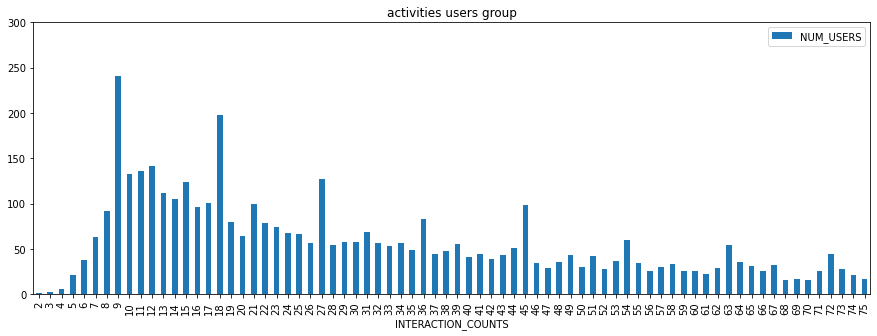

In [21]:
num_interactions = 75
activities.loc[:num_interactions,:].plot(kind='bar', figsize=(15,5), ylim=(0,300))
plt.title("activities users group")

plt.show()

인터렉션이 전체인 최소인 2번에서 1019번까지의 유저수의 분포를 확인 합니다.

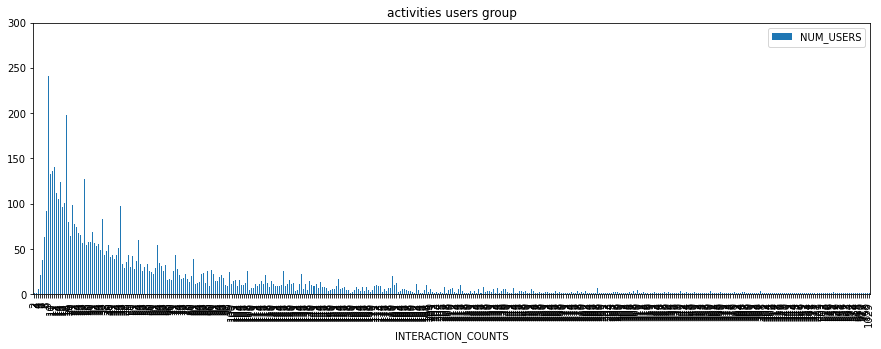

In [22]:
num_interactions = 1029
activities.loc[:num_interactions,:].plot(kind='bar', figsize=(15,5), ylim=(0,300))
plt.title("activities users group")

plt.show()

## Validation 데이터의 유저 액티비티 통계

Train 분포는 아래와 같습니다. <br>
**유저에 대해서 최소는 1번이고, 중간값은 5번, 최대는 115번을 rating을 했습니다.**


In [23]:
pd.options.display.max_rows = 10
user_activity_counts = df_warm_holdout.groupby("USER_ID").count().loc[:,["EVENT_TYPE"]].rename(columns={"EVENT_TYPE":"INTERACTION_COUNTS"})
user_activity_counts.describe()

,INTERACTION_COUNTS
count,6040.000000
mean,8.471192
std,9.548154
min,1.000000
25%,2.000000
50%,5.000000
75%,11.000000
max,115.000000


#### 인터렉션 수 대비 유저 수 분포

이번에는 인터렉션 대비 몇 명의 유저가 했는지를 확인 합니다.
추후에 캠페인의 성능 분석을 하기 위해서 사용을 합니다. 분포를 보니 2~5번에 많이 포진 되어 있습니다.

In [24]:
user_interaction_counts=user_activity_counts.reset_index()
activities = user_interaction_counts.groupby('INTERACTION_COUNTS').count()
activities.columns=['NUM_USERS']
activities

,NUM_USERS
INTERACTION_COUNTS,
1,337
2,1182
3,744
4,558
5,454
...,...
75,1
80,1
86,1


1번에서 50번 까지의 분포 입니다.

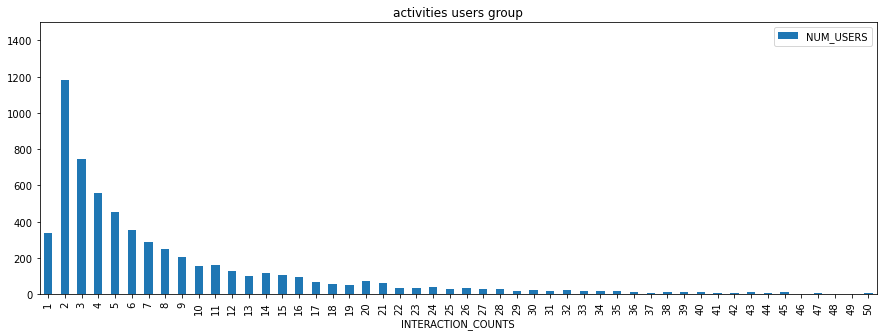

In [25]:
num_interactions = 50
activities.loc[:num_interactions,:].plot(kind='bar', figsize=(15,5), ylim=(0,1500))
plt.title("activities users group")

plt.show()

인터렉션이 전체인 최소인 1번에서 115 번까지의 유저수의 분포를 확인 합니다.

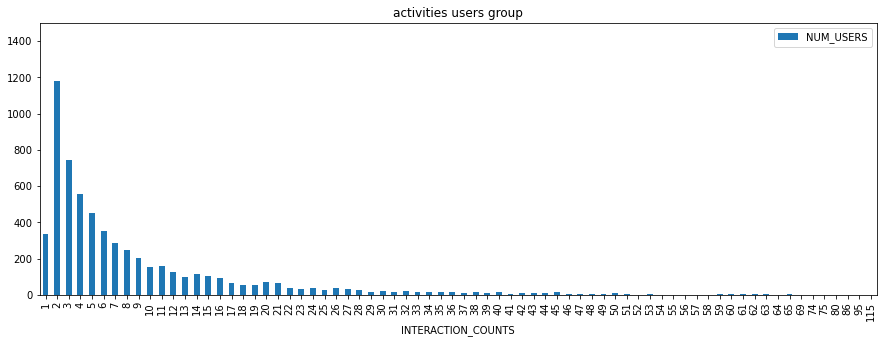

In [26]:
num_interactions = 115
activities.loc[:num_interactions,:].plot(kind='bar', figsize=(15,5), ylim=(0,1500))
plt.title("activities users group")

plt.show()